In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('packets.tsv', sep='\t', header=None)

data.columns = ['time', 'src', 'dst', 'data']

data.to_csv('packets.csv', index=False)

: 

In [ ]:
energy_consumption = pd.read_csv('yo.tsv', sep=' ', header=None)
energy_consumption.columns = ["Mote", "Radio on (%)", "Radio TX (%)", "Radio RX (%)"]

energy_consumption.to_csv('yo.csv', index=False)

In [6]:
data.head()

,time,src,dst,data
0,1537,2,-,64: 0x41C801CD ABFFFF02 02020002 74120041 6000...
1,1540,2,-,64: 0x41C801CD ABFFFF02 02020002 74120041 6000...
2,1543,2,1,64: 0x41C801CD ABFFFF02 02020002 74120041 6000...
3,1547,2,-,64: 0x41C801CD ABFFFF02 02020002 74120041 6000...
4,1550,2,-,64: 0x41C801CD ABFFFF02 02020002 74120041 6000...


# Packet Delivery Ratio

Total Transmitted Packets: 2688
Total Received Packets: 524
Packet Delivery Ratio: 19.49%


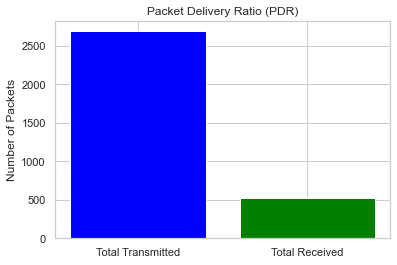

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the radio messages into a DataFrame (replace 'data.csv' with your file)
df = pd.read_csv('packets.csv')

# Count transmitted packets
total_transmitted = len(df)

# Identify successfully received packets
successfully_received = df[df['dst'] != '-']

# Count successfully received packets
total_received = len(successfully_received)

# Calculate PDR
pdr = (total_received / total_transmitted) * 100

print(f'Total Transmitted Packets: {total_transmitted}')
print(f'Total Received Packets: {total_received}')
print(f'Packet Delivery Ratio: {pdr:.2f}%')

# Plotting
labels = ['Total Transmitted', 'Total Received']
values = [total_transmitted, total_received]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Number of Packets')
plt.title('Packet Delivery Ratio (PDR)')
plt.show()


# End to End Delay

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the radio messages into a DataFrame (replace 'data.csv' with your file)
df = pd.read_csv('packets.csv')

# Convert the 'time' column to datetime for easier calculations
df['time'] = pd.to_datetime(df['time'], unit='s')

# Identify successfully received packets
successfully_received = df[df['dst'] != '-'].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Calculate end-to-end delay
successfully_received['end_to_end_delay'] = successfully_received.groupby('src')['time'].diff().fillna(pd.Timedelta(seconds=0))

# Print data used for the histogram
nodes = successfully_received['src'].unique()
average_delays = []

for i, node in enumerate(nodes):
    node_data = successfully_received[successfully_received['src'] == node]
    average_delay = node_data['end_to_end_delay'].mean().total_seconds()
    average_delays.append(average_delay)

    # Print data for each node
    print(f'Node {node}: Average End-to-End Delay = {average_delay} seconds')

Node 2: Average End-to-End Delay = 1357.666666 seconds
Node 1: Average End-to-End Delay = 205.576744 seconds
Node 6: Average End-to-End Delay = 1156.235294 seconds
Node 9: Average End-to-End Delay = 1537.461538 seconds
Node 5: Average End-to-End Delay = 1398.965517 seconds
Node 10: Average End-to-End Delay = 1241.516129 seconds
Node 8: Average End-to-End Delay = 1523.782608 seconds
Node 11: Average End-to-End Delay = 869.260869 seconds
Node 3: Average End-to-End Delay = 1114.828571 seconds
Node 4: Average End-to-End Delay = 915.121212 seconds
Node 7: Average End-to-End Delay = 952.681818 seconds


C:\Users\HP\AppData\Local\Temp\ipykernel_24388\3559621885.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successfully_received['end_to_end_delay'] = successfully_received.groupby('src')['time'].diff().fillna(pd.Timedelta(seconds=0))


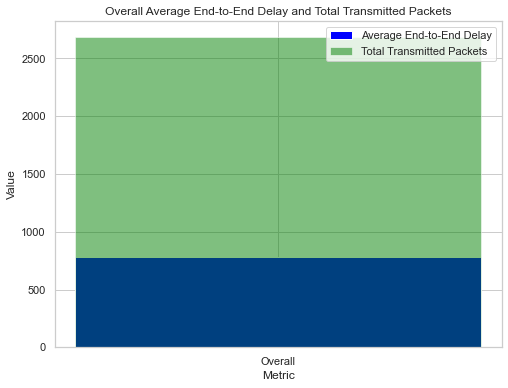

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the radio messages into a DataFrame (replace 'data.csv' with your file)
df = pd.read_csv('packets.csv')

# Convert the 'time' column to datetime for easier calculations
df['time'] = pd.to_datetime(df['time'], unit='s')

# Identify successfully received packets
successfully_received = df[df['dst'] != '-']

# Calculate end-to-end delay
successfully_received['end_to_end_delay'] = successfully_received.groupby('src')['time'].diff().fillna(pd.Timedelta(seconds=0))

# Calculate overall average end-to-end delay
overall_average_delay = successfully_received['end_to_end_delay'].mean().total_seconds()

# Count total transmitted packets
total_transmitted = len(df)

# Plotting Overall Average End-to-End Delay in terms of Total Packets
plt.figure(figsize=(8, 6))
plt.bar('Overall', overall_average_delay, color='blue', label='Average End-to-End Delay')
plt.bar('Overall', total_transmitted, color='green', alpha=0.5, label='Total Transmitted Packets')

plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Overall Average End-to-End Delay and Total Transmitted Packets')
plt.legend()
plt.grid(True)
plt.show()


# Energy Consumption

**The presented bar chart illustrates the energy consumption across Sky nodes, emphasizing key parameters: AVG ON (Average Active Time), AVG TX (Average Transmit), AVG RX (Average Receive), and AVG INT (Average Idle/Standby). These metrics encapsulate critical aspects of energy utilization in wireless sensor networks. AVG ON signifies the duration of active operation, while AVG TX and AVG RX quantify energy spent in data transmission and reception. AVG INT represents energy consumption during idle states. The visualization provides a concise overview, aiding in the assessment of energy distribution patterns, crucial for optimizing the efficiency and performance of wireless nodes in terms of power consumption.**

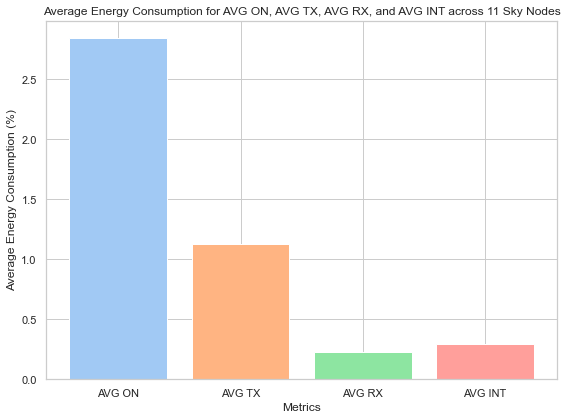

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'AVG ON': 2.84,
    'AVG TX': 1.13,
    'AVG RX': 0.23,
    'AVG INT': 0.29,
    'Sky_1 ON': 5.68,
    'Sky_1 TX': 2.38,
    'Sky_1 RX': 0.48,
    'Sky_1 INT': 0.56,
    'Sky_2 ON': 2.57,
    'Sky_2 TX': 1.02,
    'Sky_2 RX': 0.23,
    'Sky_2 INT': 0.25,
    'Sky_3 ON': 2.66,
    'Sky_3 TX': 1.22,
    'Sky_3 RX': 0.16,
    'Sky_3 INT': 0.19,
    'Sky_4 ON': 3.01,
    'Sky_4 TX': 1.43,
    'Sky_4 RX': 0.14,
    'Sky_4 INT': 0.29,
    'Sky_5 ON': 2.27,
    'Sky_5 TX': 0.70,
    'Sky_5 RX': 0.23,
    'Sky_5 INT': 0.27,
    'Sky_6 ON': 3.10,
    'Sky_6 TX': 1.26,
    'Sky_6 RX': 0.28,
    'Sky_6 INT': 0.45,
    'Sky_7 ON': 2.57,
    'Sky_7 TX': 1.05,
    'Sky_7 RX': 0.14,
    'Sky_7 INT': 0.30,
    'Sky_8 ON': 1.98,
    'Sky_8 TX': 0.64,
    'Sky_8 RX': 0.16,
    'Sky_8 INT': 0.16,
    'Sky_9 ON': 2.83,
    'Sky_9 TX': 1.26,
    'Sky_9 RX': 0.22,
    'Sky_9 INT': 0.23,
    'Sky_10 ON': 2.46,
    'Sky_10 TX': 0.92,
    'Sky_10 RX': 0.21,
    'Sky_10 INT': 0.27,
    'Sky_11 ON': 2.15,
    'Sky_11 TX': 0.56,
    'Sky_11 RX': 0.29,
    'Sky_11 INT': 0.24
}

# Extract average energy consumption values for 'AVG ON', 'AVG TX', 'AVG RX', and 'AVG INT'
avg_on = sum(data[f'Sky_{i} ON'] for i in range(1, 12)) / 11
avg_tx = sum(data[f'Sky_{i} TX'] for i in range(1, 12)) / 11
avg_rx = sum(data[f'Sky_{i} RX'] for i in range(1, 12)) / 11
avg_int = sum(data[f'Sky_{i} INT'] for i in range(1, 12)) / 11

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

# Plotting
plt.figure(figsize=(8, 6))
palette = sns.color_palette("pastel", 4)

plt.bar(['AVG ON', 'AVG TX', 'AVG RX', 'AVG INT'], [avg_on, avg_tx, avg_rx, avg_int], color=palette)
plt.xlabel('Metrics')
plt.ylabel('Average Energy Consumption (%)')
plt.title('Average Energy Consumption for AVG ON, AVG TX, AVG RX, and AVG INT across 11 Sky Nodes')
plt.tight_layout()
plt.show()
